In [1]:
import numpy as np 
import cv2
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
from PIL import Image
import math


(1024, 16192, 4)
(2048, 16192, 4)
(3072, 16192, 4)
(4096, 16192, 4)
(5120, 16192, 4)
(6144, 16192, 4)
(7168, 16192, 4)
(8192, 16192, 4)
(9216, 16192, 4)
(10240, 16192, 4)
(11264, 16192, 4)
(12288, 16192, 4)
(13312, 16192, 4)
(14336, 16192, 4)
(15360, 16192, 4)
(16384, 16192, 4)
(16384, 16192, 4)
23.0
16.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


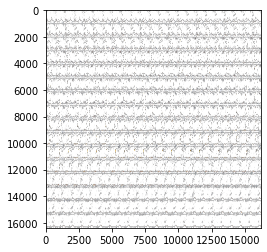

In [27]:
# mypath = "/home/tmc/project/instant_nerf/data/nerf/fox/rgba_slices"
# output = "/home/tmc/project/instant_nerf/data/nerf/fox/"
mypath = "/home/tmc/project/instant_nerf/tulagu/rgba_slices"
output = "/home/tmc/project/instant_nerf/tulagu/"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles.sort()
n_row = 0 
n_column = 23 #26
rows = None 
column = None
first_run = True
first_column_run = True
image_index = 0 
dimention = None 
while image_index < len(onlyfiles): 
# while False: 
    first_run = True 
    for i in range(n_column):

        if image_index < len(onlyfiles): 
            image = Image.open(f"{mypath}/{onlyfiles[image_index]}")
            image = np.asarray(image)
            image_index = image_index + 1 
            # image = np.ones_like(image)
            # image[:,:] = (0, 0, 0, 255)
            # if image_index == 400:
            #     plt.imshow(image)
            #     plt.show()
        else: 
            image = np.ones(dimention)
            # image[:,:] = (0, 0, 0, 255)
           
        if first_run : 
            column = image
            first_run = False
            dimention = image.shape    
        else: 
            column = np.hstack((column, image))
    # image_index = len(onlyfiles)
        # plt.imshow(image)
        # plt.show()
    if first_column_run: 
        rows = column
        first_column_run = False  
    else: 
        rows = np.vstack((rows, column))
    print(rows.shape)

# print(dimention)
rows = np.float32(rows)
rows = cv2.cvtColor(rows, cv2.COLOR_BGRA2RGBA)
# Image.fromarray(rows).save(f"{output}/grid.png", rows)
cv2.imwrite(f"{output}/grid.png", rows)
print(rows.shape)
print(rows.shape[1] / dimention[1])
print(rows.shape[0] / dimention[0])
plt.imshow(rows)
plt.show()

In [ ]:
image = np.zeros((255, 255, 4))
cv2.imwrite(f"{output}/grid.png", image)



In [ ]:
from PIL import Image

from os import listdir
from os.path import isfile, join
mypath = "/home/tmc/project/instant_nerf/data/nerf/fox/rgba_slices2"
output = "/home/tmc/project/instant_nerf/data/nerf/fox/"
files = [ f for f in listdir(mypath) if isfile(join(mypath, f)) ]
files.sort()
single_image_dimention = 256
image_per_row = 100
ncol = math.ceil(len(files) / image_per_row)

new_im = Image.new('RGB', (single_image_dimention * image_per_row, single_image_dimention * image_per_row))
index = 0
for i in range(0,single_image_dimention * image_per_row, single_image_dimention):
    if index >= len(files):
            break
    for j in range(0, ncol * single_image_dimention, single_image_dimention):
        im = Image.open(f"{mypath}/{files[index]}")
        im.thumbnail((single_image_dimention, single_image_dimention))
        new_im.paste(im, (i,j))
        index += 1
        if index >= len(files):
            break

new_im.save(f"{output}/grid.png")


In [ ]:


dtype = np.dtype('B')

try:
    with open("/home/tmc/project/nerf_pl/volume/lego.vol", "rb") as f:
        numpy_data = np.fromfile(f,dtype)
    # print(len(numpy_data))
except IOError:
    print('Error While Opening the file!')    

index = 0
vF = [] 
while index < len(numpy_data): 
    temp = [numpy_data[index], numpy_data[index + 1], numpy_data[index + 2], numpy_data[index + 3]]
    byte_iterable =  bytes(temp)
    final_value = int.from_bytes(byte_iterable, byteorder='little')
    vF.append(final_value)
    index += 4 

In [ ]:
size = 512
height = 512
width = 512
img = np.zeros((height,width,3), np.uint8)
slices = []
for i in range(size):
    img = np.zeros((height,width,4), np.uint8)
    slices.append(img)

In [ ]:
plane = slices[0]
plane[0, 0][0] = 0

In [ ]:
c = 0 
while c < len(vF): 
    x = int(vF[c])
    i = int(x / size / size )
    j = int((x - size * size * i) / size)
    k = int(x % size) 
    col = vF[c + 1]
    r = ((col & 0xFF000000) >> 24) / 255.0
    g = ((col & 0x00FF0000) >> 16) / 255.0
    b = ((col & 0x0000FF00) >> 8) / 255.0
    a = (col & 0x000000FF) / 255.0
    # if r > 0 or g > 0 or b >> 0 or a >> 0: 
    #     print(f"WTF: r: {r}, g: {g}, b: {b}")
    slice = slices[i]
    slice[k, j][0] = b * 255
    slice[k, j][1] = g * 255
    slice[k, j][2] = r * 255
    slice[k, j][3] = a  * 255
    c+=2 


In [ ]:
512 / 8

In [ ]:
def gallery(array, ncols=3):
    nindex, height, width, intensity = array.shape
    nrows = nindex//ncols
    assert nindex == nrows*ncols
    # want result.shape = (height*nrows, width*ncols, intensity)
    result = (array.reshape(nrows, ncols, height, width, intensity)
              .swapaxes(1,2)
              .reshape(height*nrows, width*ncols, intensity))
    return result

def make_array():
    from PIL import Image
    return np.array([np.asarray(Image.open('face.png').convert('RGB'))]*12)

# array = make_array()
array = np.array(slices)
print(array.shape)
print(len(slices))

result = gallery(array, 8 * 4)
# result = gallery(array)

# result = np.array(slices)
# plt.imshow(result)
# plt.show()
path = "/home/tmc/project/nerf_pl/img/"
cv2.imwrite(f"{path}/grid.png", result)

In [ ]:
counter = 0
path = "/home/tmc/project/nerf_pl/img/"
for img in slices: 
    cv2.imwrite(f"{path}/img_{counter}.png", img)
    counter += 1 
    
    

In [ ]:
# slices_new = []
# for afile in slices:
     
#     arr = np.array(afile).flatten('C')  #if image gets transposed, then flatten('F')
#     slices_new.append(arr)

arr2 = np.array(slices).flatten('C').astype('short')
arr2.tofile(f"{path}OutputFile.raw")

In [ ]:
    
    c += 2 
for (int c = 0; c < vF.Length; c += 2)
        {
            int x = (int)vF[c];
            int i = x / size / size;
            int j = (x - size * size * i) / size;
            int k = x % size;
            uint col = vF[c + 1];
            float r = ((col & 0xFF000000) >> 24) / 255.0f;
            float g = ((col & 0x00FF0000) >> 16) / 255.0f;
            float b = ((col & 0x0000FF00) >> 8) / 255.0f;
            float a = (col & 0x000000FF) / 255.0f;

            Color color = new Color(r, g, b, a);
            tex.SetPixel(k, j, i, color);
        }
